# Regular Chain/SSH Model
$$\textbf{Regular Chain}$$
El Hamiltoniano del sistema que vamos a resolver es:
$$ H= \omega \sum_j{a_j^\dagger a_j} + J \sum_j{a_j^\dagger a_{j+1}}+ h.c.$$

El término $h.c.$ representa el hermitico conjugado, de forma que nuestro Hamiltoniano es:
$$H= \omega \sum_j{a_j^\dagger a_j} + J \sum_j{a_j^\dagger a_{j+1}}+ J^* \sum_j{a_{j+1}^\dagger a_j}$$

Aunque como la constante de acoplo $J$ en principio será real $J^*=J$.

$$\textbf{SSH Model}$$
Si implementamos dos valores distintos del hopping $J_1$ $J_2$ obtenemos el Modelo SSH (si queremos ser exactos $\omega=0$. Por lo qjue su Hamiltoniano será:
$$H= \omega \sum_{j=0}^N{a_j^\dagger a_j} +  \sum_{j=0}^{N/2}{J_1 a_j^\dagger a_{j+1}+ J_2 a_{j+1}^\dagger a_{j+2}}+ h.c.$$

In [19]:
#We set these variables so just changing these the whole program changes
SSH=True
RiceMele=False
ComputeMatrixElements=False
PeriodicBoundary=False
FancyDisplay=False

In [20]:
from sympy.interactive import printing
printing.init_printing(use_latex = True)

import numpy as np
import sympy as sp
import scipy as sc
from scipy.misc import derivative
from sympy import *
from numpy.linalg import eig
from numpy import sin
from numpy import pi
from sympy import Array
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size']=22

In [21]:
N=50 #For N=3000 the program obtains the eigenvalues and eigenvectors in 1 min 30 s
m=sp.Symbol('m', real=True)
#ω=sp.Symbol('ω', real=True)
x=sp.Symbol('x', real=True)
#J=sp.Symbol('J', real=True)
if SSH:
    if RiceMele:
        Δ=0
    J1=-1.5 #Intracell hopping  
    J2=-1 #Intercell hopping
else:
    J=5
    ω=10
ħ=1
L=1


In [22]:
def a(n):
    if n==0:
        return 0, 0
    else:
        return n-1, np.sqrt(n)

def a_plus(n):

    return n+1, np.sqrt(n+1)

In [23]:
def bracket(bra1, ket1):
    resultado=1
    for i in range (N):
        if bra1[i]==ket1[i]:
            resultado*=1
        else:
            resultado*=0
    #print("Subalgoritmo bra-ket")
    #print(bra1, ket1)
    #print(resultado)
    return resultado

In [24]:
def Elemento_matriz_Hamiltoniano(bra, ket):
    #print(bra,ket)
    #<bra|H|ket>
    
    H=0
    ket_aux=[]
    ket_aux2=[]
    ket_aux3=[]
    ket_aux4=[]
    
    for i in range(len(ket)):
        ket_aux=ket.copy()
        ket_aux2=ket.copy()
        ket_aux3=ket.copy()
        ket_aux4=ket.copy()
        bra_aux=bra.copy()
        #print("El valor de bra en el subalgoritmo")
        #print(bra)
        #coef_term2=coef_term2_aux=coef_term3=coef_term3_aux=0
        term1=ω*ket[i]*bracket(bra_aux, ket_aux)
        if i==N-1:
            #print("Entro en el primer if")
            #P.B.C.
            ket_aux[0], coef_term2=a(ket_aux[0])
            #H.B.C.
            #ket_aux[0], coef_term2=0,0
            ket_aux[i], coef_term2_aux=a_plus(ket_aux[i])
            term2=J*coef_term2*coef_term2_aux*bracket(bra_aux, ket_aux)
            ket_aux2[i], coef_term3=a(ket_aux2[i])
            #P.B.C.
            ket_aux2[0], coef_term3_aux=a_plus(ket_aux2[0])
            #H.B.C.
            #ket_aux2[0], coef_term3_aux=0,0
            term3=(J)*coef_term3*coef_term3_aux*bracket(bra_aux, ket_aux2)

        else:
            #print("Entro en el else")
            ket_aux[i+1], coef_term2=a(ket_aux[i+1])
            ket_aux[i], coef_term2_aux=a_plus(ket_aux[i])
            term2=J*coef_term2*coef_term2_aux*bracket(bra_aux, ket_aux)
            ket_aux2[i], coef_term3=a(ket_aux2[i])
            ket_aux2[i+1], coef_term3_aux=a_plus(ket_aux2[i+1])
            term3=(J)*coef_term3*coef_term3_aux*bracket(bra_aux, ket_aux2)

        #print(term1, term2, term3, term4, term5)
        H+=term1+term2+term3
    #print("\n")
    return H

def func_aux(i, j):
    #print(i,j)
    Identity=[[]]
    Identity=np.identity(N)
    base=[]
    for k in range(N):
        base.append(Identity[k,:])
    base=np.asarray(base)
    res=Elemento_matriz_Hamiltoniano(base[i], base[j])
    return res

In [25]:
def FastHamiltonian(N, J1, J2, Δ):
    #Manera rapida de calcular el Hamiltoniano
    aux_N=int(N/2) #Numero de celdas
    H_int1=[[0, 1], [1, 0]]
    aux1=np.kron(np.eye(aux_N), H_int1)
    aux2=np.eye(N, k=1)+np.eye(N, k=-1)-aux1
    if SSH:
        H=J1*aux1+J2*aux2
        if RiceMele:
            H_aux3=[[1,0], [0, -1]]
            aux3=np.kron(np.eye(aux_N), H_aux3)
            H+=aux3*Δ
    else:
        H=J1*aux1+J1*aux2+J2*np.eye(N)
    if PeriodicBoundary:
        H[0, N-1]=J2
        H[N-1, 0]=J2
    if FancyDisplay:
        H=Matrix(H)
    return H

In [26]:
if ComputeMatrixElements:
    H=Matrix(N, N, func_aux)
else:
    if SSH:
        if RiceMele:
            H=FastHamiltonian(N, J1, J2, Δ)
        else:
            H=FastHamiltonian(N, J1, J2,0)
    else:
        H=FastHamiltonian(N, J, ω, 0)
if FancyDisplay:
    display(H)

In [27]:
#Manera de hacerlo simbolicamente en terminos de J y ω
#eigval=list(H.eigenvals().keys())
#display(eigval)

#Manera de hacerlo numéricamente
if FancyDisplay:
    H=np.array(H).astype(np.float64)
eigval, eigvect=eig(H)
idx = np.argsort(eigval)
eigval = eigval[idx]
#No sé cual ess la forma buena
eigvect=eigvect[:,idx]
if SSH:
    eigv1=eigval[:int(N/2)]
    eigv2=eigval[int(N/2):]
    eigv2=eigv2[::-1]
    eigvect1=eigvect[:,:int(N/2)]
    eigvect2=eigvect[:,int(N/2):]
    #print(np.size(eigvect1), np.size(eigvect1[:, 0]), np.size(eigvect2))
else:
    eigval_aux=eigval[1::2]
    Eigval=[]
    eigval_aux=eigval_aux[::-1]
    eigval=eigval[::2]
    eigval_aux=eigval_aux.tolist()
    eigval1=eigval.tolist()
    eigval=eigval_aux+eigval1

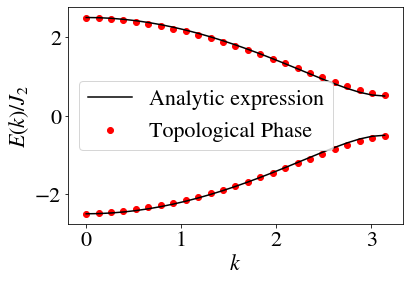

In [28]:
if SSH:
    if RiceMele:
        stringModel='Rice-Mele Model '
    else:
        stringModel='SSH Model '
else:
    stringModel='Regular Chain '
if PeriodicBoundary:
    stringBoundary='Periodic Boundary Conditions'
else:
    stringBoundary='Open Boundary Conditions'
plt.figure()
if SSH:
    if RiceMele:
        i=complex(0,1)
        a=np.linspace(0,np.pi/L, len(eigv1))
        plt.scatter(a,eigv2, color='red', label ='Numerical values')
        plt.plot(a, np.sqrt(Δ**2+abs(J2+J1*np.exp(-i*a))**2), color='black', label ='Analytic expression')
        plt.scatter(a,eigv1, color='red')
        plt.plot(a,-np.sqrt(Δ**2+abs(J2+J1*np.exp(-i*a))**2), color='black')
    
    else:
        a=np.linspace(0,np.pi/L, len(eigv1))
        plt.scatter(a,eigv2/J2, color='red', label ='Topological Phase')
        plt.plot(a, np.sqrt(J1**2+J2**2+2*J1*J2*np.cos(a))/J2, color='black', label ='Analytic expression')
        plt.scatter(a,eigv1/J2, color='red')
        plt.plot(a, -np.sqrt(J1**2+J2**2+2*J1*J2*np.cos(a))/J2 , color='black')
        triv1, triv2=np.loadtxt('trivial.txt', unpack=True)
        #plt.scatter(a,triv1/J2, color='blue', marker='x', label='Trivial Phase')
        #plt.scatter(a,triv2/J2, color='blue', marker='x')
        #np.savetxt('trivial.txt', np.column_stack([eigv1, eigv2]))
else:
    a=np.linspace(-np.pi/L,np.pi/L, len(eigval))
    plt.scatter(a,eigval, color='red', label='Simulated values' )
    plt.plot(a,ω-2*J*np.cos(a), color='black', label='Analytic Expression')
plt.legend()
plt.xlabel("$k$")
plt.ylabel("$E(k)/J_2$")
#plt.title(stringModel+"Dispersion relation J_1="+ str(J1)+" J_2="+str(J2)+ " with "+ stringBoundary)
plt.savefig('DispersionRelation.png')
plt.show()

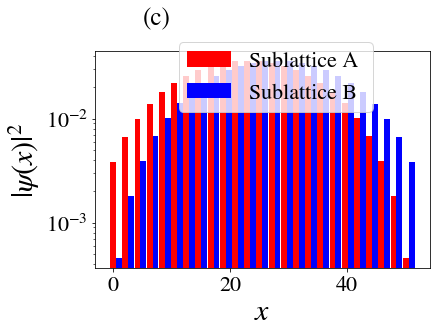

In [29]:
i_Eig=0
if SSH:
    aux_eig2=(abs(eigvect2[:,i_Eig]))**2
    eigA= aux_eig2[::2]
    eigB=aux_eig2[1::2]
    xA=np.linspace(0, L*len(eigvect[:,0]), len(eigA) )
    xB=np.linspace(0, L*len(eigvect[:,0])/2, len(eigB))
    xB=2*xB+1
    plt.figure()
    plt.bar(xA, eigA, width=1,color='red', label='Sublattice A ')
    plt.bar(xB, eigB, color='blue', width=1, label='Sublattice B ')
    plt.xlabel("$x$", size=30)
    plt.ylabel("$|ψ(x)|^2$", size=30)
    plt.yscale('log')
    #plt.title(stringModel+"Eigenvector number "+ str(i_Eig)+" using J1="+ str(J1)+" J2="+str(J2)+ " with "+ stringBoundary)
    plt.legend(loc=[0.25, 0.72])
    #plt.text(35,0.036, s="Sublattices", size=25)
    plt.text(5, 0.08, s='(c)', size=25)
    plt.savefig('EigenVector.png')
    plt.show()
else:
    aux_eig=eigvect[:,i_Eig]
    x=np.linspace(0, L*len(eigvect[:,0]), len(aux_eig) )
    plt.figure(figsize=[12, 9])
    plt.bar(x, aux_eig, width=0.9,color='red')
    plt.xlabel("$x$", size=15)
    plt.ylabel("|ψ(x)|^2", size=15)
    #plt.title(stringModel+"Eigenvector "+ str(i_Eig)+" ω="+ str(ω)+" J="+str(J)+ " with "+ stringBoundary)
    plt.savefig('EigenVector.png')
    plt.show()

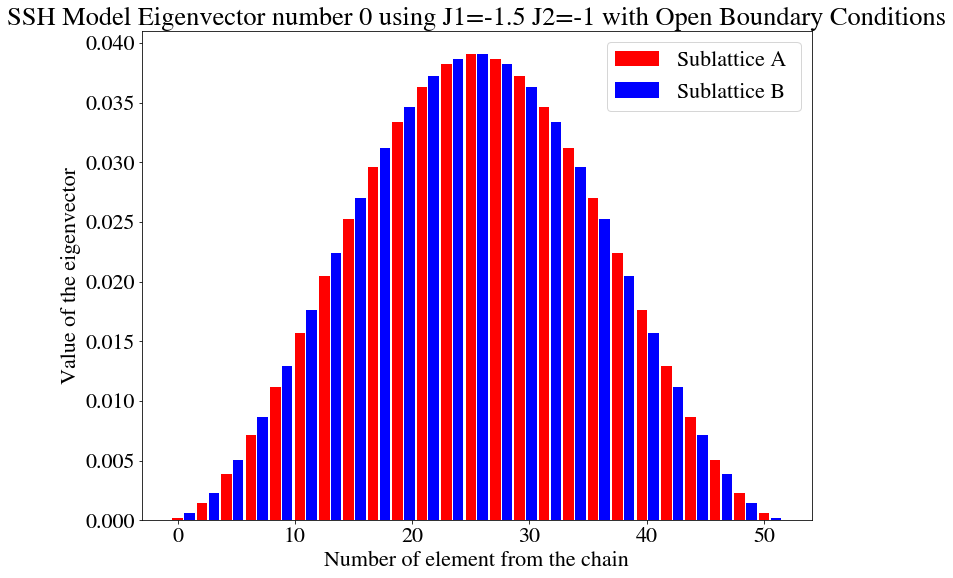

In [30]:
i_Eig=0
if SSH:
    aux_eig1=((eigvect1[:,i_Eig]))**2
    eigA= aux_eig1[::2]
    eigB=aux_eig1[1::2]
    xA=np.linspace(0, L*len(eigvect[:,0]), len(eigA) )
    xB=np.linspace(0, L*len(eigvect[:,0])/2, len(eigB))
    xB=2*xB+1
    plt.figure(figsize=[12, 9])
    plt.bar(xA, eigA, width=0.9,color='red', label='Sublattice A ')
    plt.bar(xB, eigB, color='blue', width=0.9, label='Sublattice B ')
    plt.xlabel("Number of element from the chain")
    plt.ylabel("Value of the eigenvector")
    plt.title(stringModel+"Eigenvector number "+ str(i_Eig)+" using J1="+ str(J1)+" J2="+str(J2)+ " with "+ stringBoundary)
    plt.savefig('EigenVector.png')
    plt.legend()
    plt.show()
else:
    aux_eig=eigvect[:,i_Eig]
    x=np.linspace(0, L*len(eigvect[:,0]), len(aux_eig) )
    plt.figure(figsize=[12, 9])
    plt.bar(x, aux_eig, width=0.9,color='red')
    plt.xlabel("Number of element from the chain")
    plt.ylabel("Value of the eigenvector")
    plt.title(stringModel+"Eigenvector "+ str(i_Eig)+" ω="+ str(ω)+" J="+str(J)+ " with "+ stringBoundary)
    plt.savefig('EigenVector.png')
    plt.show()

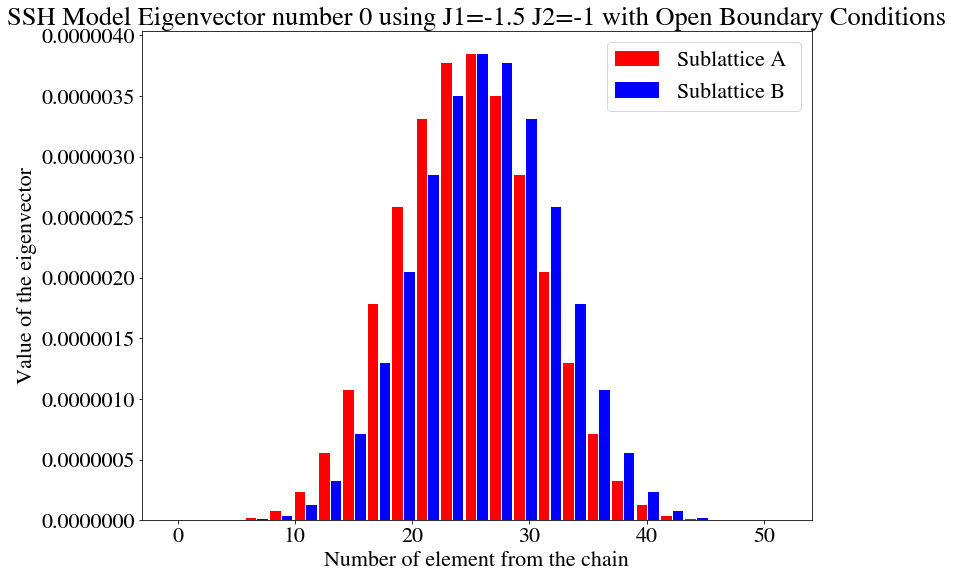

93757977175.8789


In [31]:
#PRODUCTO 
psi=((aux_eig1*aux_eig2+aux_eig2*aux_eig1)/np.sqrt(2))**2
eigA= psi[::2]
eigB=psi[1::2]
xA=np.linspace(0, L*len(eigvect[:,0]), len(eigA) )
xB=np.linspace(0, L*len(eigvect[:,0])/2, len(eigB))
xB=2*xB+1
plt.figure(figsize=[12, 9])
plt.bar(xA, eigA, width=0.9,color='red', label='Sublattice A ')
plt.bar(xB, eigB, color='blue', width=0.9, label='Sublattice B ')
plt.xlabel("Number of element from the chain")
plt.ylabel("Value of the eigenvector")
plt.title(stringModel+"Eigenvector number "+ str(i_Eig)+" using J1="+ str(J1)+" J2="+str(J2)+ " with "+ stringBoundary)
#plt.savefig('EigenVector.png')
plt.legend()
plt.show()
PRProd=sum(psi**2)/sum(psi**4)
print(PRProd)

Podemos escribir el hamiltoniano en el esspacio recíproco de la forma:
$$H_q=\langle q | H | q \rangle=-\begin{pmatrix}
\Delta & J'+J e^{-i q a}\\ 
 J'+J e^{i q a}& -\Delta
\end{pmatrix}$$

Esta matriz es general para el modelo de Rice Mele, si $\Delta=0$ se reduce al modelo SSH.

Esta matriz se escribe en términos de las matrices de Pauli:
$$H_q=h_x \sigma_x+ h_y \sigma_y + h_z \sigma_z$$

Y esto define el vector $\vec{h}=(h_x, h_y, h_z)$

En el modelo SSH $h_z=0$ $h_x=J'+J \cos qa$ y $h_y=J \sin qa$


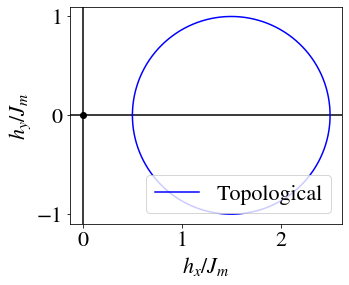

In [37]:
if SSH:
    N_points=3000
    q=np.linspace(-np.pi/L, np.pi/L, N_points)
    h_x=J1+J2*np.cos(q*L)
    h_y=J2*np.sin(q*L)
    if RiceMele:
        h_z=Δ*np.ones(N_points)
        fig=plt.figure()
        ax = plt.axes(projection='3d')
        ax.plot3D(h_x, h_y, h_z)
        plt.savefig("h_vect.png")
        plt.show()
    else:
        plt.figure()
        #plt.title("Vector h")
        plt.gca().set_aspect('equal')
        plt.xlabel("$h_x/J_m$")
        plt.ylabel("$h_y/J_m$")
        plt.axis(option='on')
        plt.axvline(x=0, color='black')
        plt.axhline(y=0, color='black')
        plt.scatter(0,0, color='black')
        plt.plot(h_x/J2, h_y/J2, color='blue', label='Topological')
        #np.savetxt("trivial_h_vect.txt", np.column_stack([h_x, h_y]))
        #trivx, trivy=np.loadtxt('trivial_h_vect.txt', unpack=True)
        #plt.plot(trivx/J1, trivy/J1, color='red', label='Trivial', linestyle='--')
        plt.legend(loc=4)
        plt.savefig("h_vect.png")
        plt.show()

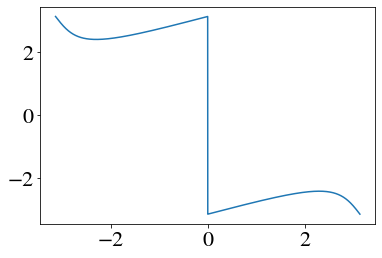

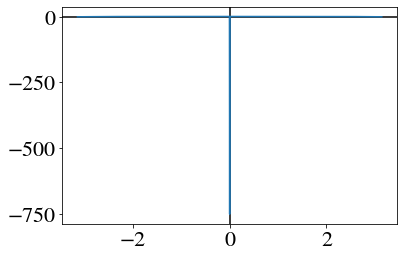

In [33]:
if SSH==True and RiceMele==False:
    def ϕ(k):
        global J1, J2
        return np.arctan2(J2*np.sin(k),(J1+J2*np.cos(k)))
    dphidk=np.zeros(len(q))
    dphidkVar=np.zeros(len(q))
    for i in range(len(q)):
        dphidk[i]=0.5*derivative(ϕ,q[i] , dx=2*np.pi/(L*N_points))
    dphidk[0]=dphidk[1]
    dphidk[N_points-1]=dphidk[N_points-2]
    ZakPhase=np.trapz(dphidk, q)
    display(ZakPhase, ZakPhase/np.pi)
    plt.figure()
    plt.plot(q, ϕ(q))
    plt.show()
    plt.figure()
    plt.axvline(x=0, color='black')
    plt.axhline(y=0, color='black')
    plt.plot(q, dphidk)
    plt.show()

Una vez obtenidos los autovalores, vemos, que efectivamente tienen un máximo, cuya expresión analítica se puede obtener resolviendo simbolicamente los autovalores(para una matriz más pequeña).

Tras esto calculamos las siguientes magnitudes:
$$N=\sum_j{|A_j|^2}=1 \qquad PR=\frac{1}{\sum_j{|A_j|^4}}$$

Donde $PR$ es el $\textit{Participation Ratio}$ y $N$ es la condición de normalización.

In [34]:
PR=0
if SSH:
    N_eigvect=len(eigvect1[0,:])
    participation_ratio1=[]
    participation_ratio2=[]
else:
    N_eigvect=len(eigvect[0, :])
    participation_ratio=[]
for j in range(N_eigvect):
    if SSH:
        Norm1=0
        PR1=0
        PR2=0
        Norm2=0
        Eigvect_j=eigvect1[:,j]
        Eigvect_j2=eigvect2[:,j]
    else:
        Norm=0
        PR=0
        Eigvect_j=eigvect[:,j]
    for i in range(len(Eigvect_j)):
        if SSH:
            Norm1+=abs(Eigvect_j[i])**2
            PR1+=abs(Eigvect_j[i])**4
            Norm2+=abs(Eigvect_j2[i])**2
            PR2+=abs(Eigvect_j2[i])**4
        else:
            Norm+=abs(Eigvect_j[i])**2
            PR+=abs(Eigvect_j[i])**4
    if SSH:
        PR1=Norm1/PR1
        PR2=Norm2/PR2
        participation_ratio1.append(PR1)
        participation_ratio2.append(PR2)
    else:
        PR=Norm/PR
        print(j, PR)
        participation_ratio.append(PR)
print(participation_ratio1)
print(participation_ratio2)


[34.134140809201774, 34.13661584734392, 34.140925672476804, 34.14738374966395, 34.15651619774872, 34.16919357200638, 34.186902714685765, 34.21235894376696, 34.25108102063319, 34.31633161050846, 34.45053325754901, 34.90831907354426, 31.007212561168036, 33.598820307282104, 33.8597431359284, 33.978010428751766, 34.06411272634315, 34.14849827934813, 34.24949650012125, 34.38746646252314, 34.5930626590623, 34.915425647202674, 35.42259491882978, 36.15403070311359, 36.953125953305566]
[36.95312595330605, 36.154030703113676, 35.42259491882977, 34.91542564720269, 34.593062659062305, 34.38746646252319, 34.24949650012123, 34.14849827934809, 34.06411272634312, 33.978010428751766, 33.85974313592841, 33.598820307282054, 31.00721256116804, 34.90831907354429, 34.45053325754903, 34.31633161050844, 34.251081020633144, 34.21235894376695, 34.186902714685765, 34.1691935720063, 34.156516197748715, 34.14738374966411, 34.1409256724767, 34.13661584734382, 34.13414080920385]


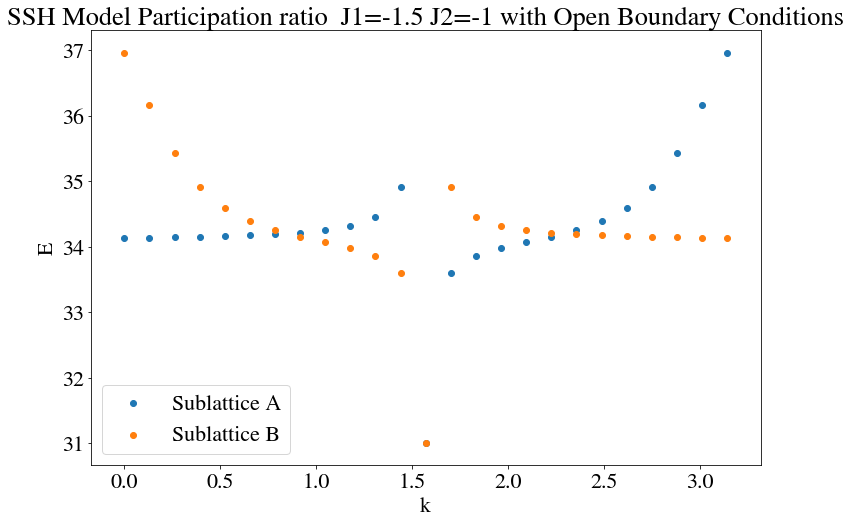

In [35]:
plt.figure(figsize=[12,8])
if SSH:
    a=np.linspace(0,np.pi/L,len(eigvect1[0,:]))
    plt.scatter(a,participation_ratio1, label='Sublattice A')
    plt.scatter(a,participation_ratio2, label='Sublattice B')
else:
    PRteor=2*N**2/(3*(N))
    a=np.linspace(-np.pi/L,np.pi/L,len(eigvect[0,:]))
    plt.scatter(a,participation_ratio, label='Numerical values')
    plt.hlines(PRteor, -pi/L, pi/L, label='Theoretical expression using sines and cosines', color='red')
#if PeriodicBoundary:
#    plt.hlines(N, -pi/L, pi/L, label='Funny eigenvectors', color='blue')
plt.legend()
#plt.ylim(0,51)
#plt.axvline(x=0, color='black')
#plt.axhline(y=0, color='black')
plt.xlabel('k')
plt.ylabel('E')
plt.title(stringModel+"Participation ratio  J1="+ str(J1)+" J2="+str(J2)+ " with "+ stringBoundary)
plt.savefig('ParticipationRatio.png')
plt.show()

In [36]:
N_array=[50, 100]
part_ratio_RM_edges=[1.6666, 1.6666]